# Introduction

In this notebook we will explore both the listings and calendar datasets for the city of Seattle and Boston as part of the project for the Udacity course in Data Science. We will analyze the data and come up with intersting points of view about the dates and availability at each city. 

The data for this analysis can be found here:
 - https://www.kaggle.com/airbnb/seattle/data
 - https://www.kaggle.com/airbnb/boston

# Setup

This notebook was created in Google Colab (https://colab.research.google.com/). 

In order for this to work you need a Google Account. At the time this notebook was created I was able to run it on the Free Tier.

The following two cells allows the notebook to access the owner's Google Drive and the directory created to store the csv file along with a custom python module. This module called `helper_functions.py` contains functions to clean up the data. You can check it for docstrings explaining each function.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Adding custom packages dir
import sys
sys.path.append('/content/drive/<my_folder>')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython import display
import helper_functions as f
import seaborn as sns
%matplotlib inline

## Calendar

The calendar datasets for Boston and Seattle identify a listing's `availability ` and `price` on a specific `date`.
The datasets have 4 columns each:

- listing_id: Indicates the listing identification number
- date: Indicates the date for in which the listing was scrapped
- available: Indicates if the listing is available for a specific date
- price: Indicates the price for the listing at a specific date

The `listing_id` and `date` columns form a composite key that identifies the price and availability for each listing.

In [ ]:
# Setting display configuration
pd.set_option("display.max_rows", None, "display.max_columns", None)
plt.rcParams['figure.figsize'] = [27, 18]

First, let's load the available data from the Boston and Seattle Airbnb datasets.

In [ ]:
calendar_boston = pd.read_csv('/content/drive/<my_folder>/calendar_boston.csv')
calendar_seattle = pd.read_csv('/content/drive/<my_folder>/calendar_seattle.csv')

# Data Exploration

### Boston Calendar

In [ ]:
print(f"Numbers of entries at the Boston Calendar Listing: {calendar_boston.shape[0]}")

Numbers of entries at the Boston Calendar Listing: 1308890


The following function will clean up the calendar_boston.csv. During my exploration I found three problems with the data:
- The date column needs to be setted correctly
- There are repeated listings
- The availability column contains strings that are harder to work with
than integers.

For the previous problems I created the clean_calendar function to handle them and allow me a simpler way to work with the data.

In [ ]:
calendar_boston = f.clean_calendar(calendar_boston)

The following two cells show us the number of distinct listings and the number of listing that have exact 365 distinct dates.

In [ ]:
# Checking the quantity of distinct listings
calendar_boston.listing_id.nunique()

3585

Now we can plot the available listings at a specific period.

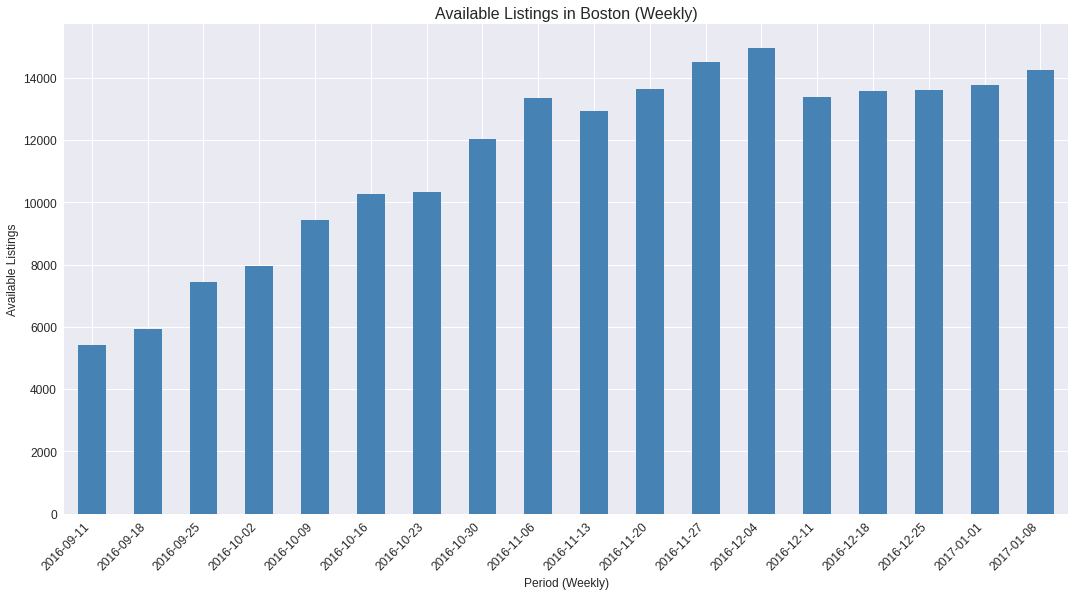

In [ ]:
f.plot_availability(calendar_boston, 'Boston', '2016-09-11', '2017-01-08')

### Seattle Calendar

Problems with missing date values

In [ ]:
calendar_seattle = f.clean_calendar(calendar_seattle)

In [ ]:
print(f"Numbers of entries at the Seattle Calendar Listing: {calendar_seattle.shape[0]}")

Numbers of entries at the Seattle Calendar Listing: 1393570


The following two cells show us the number of distinct listings and the number of listing that have exact 365 distinct dates.

In [ ]:
# Checking the quantity of distinct listings
calendar_seattle.listing_id.nunique()

3818

In [ ]:
f.check_date_range(calendar_seattle)

All listings begin at 2016-01-04 and end at 2017-01-02


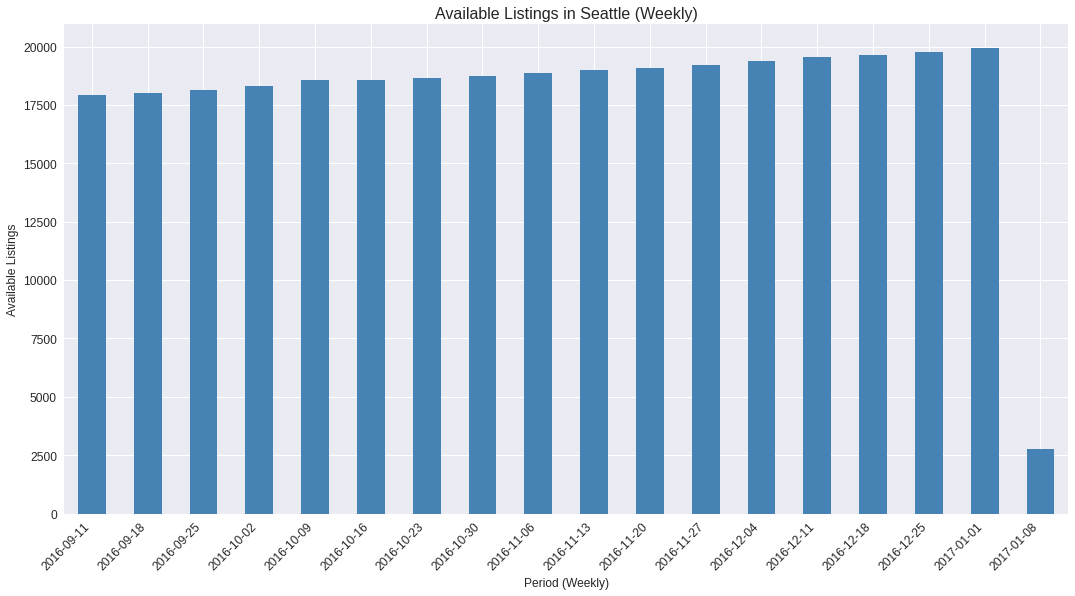

In [ ]:
f.plot_availability(calendar_seattle, "Seattle", '2016-09-11', '2017-01-08')

# Prices analysis

The prices are fairly stable with a increase at the beggining for both cities and a seasonal effect between weeks.

The most interesting thing is the variability of the prices represented by the long error margins (here they are
the standard deviation), meaning that there are very distinct prices that might be explained by other factors

Going on we will bring the listing information to analyze how other atributes might factor in the prices.

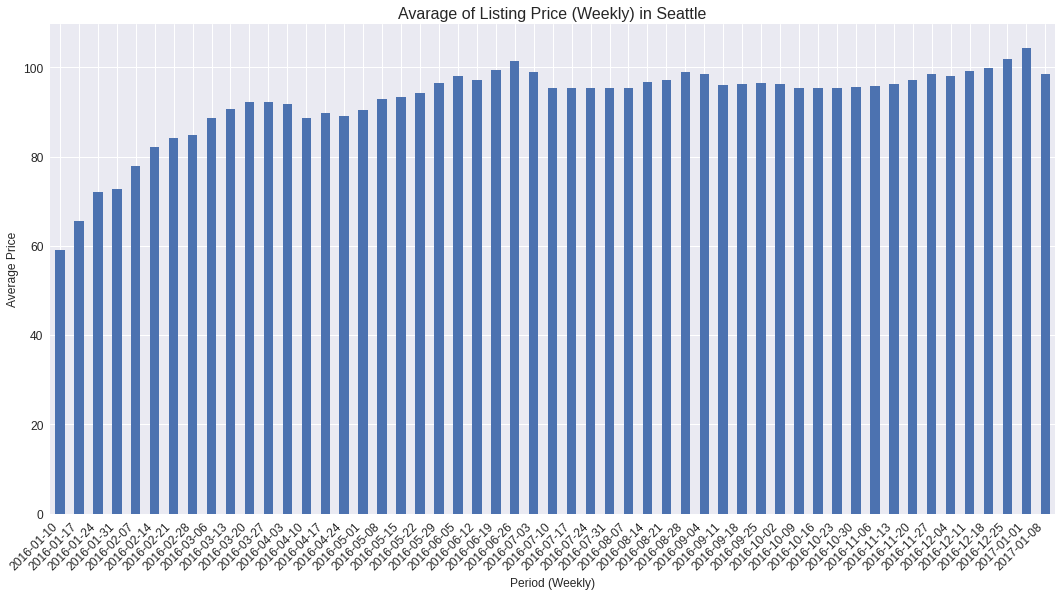

In [ ]:
f.plot_avarage_price(calendar_seattle, 'Seattle')

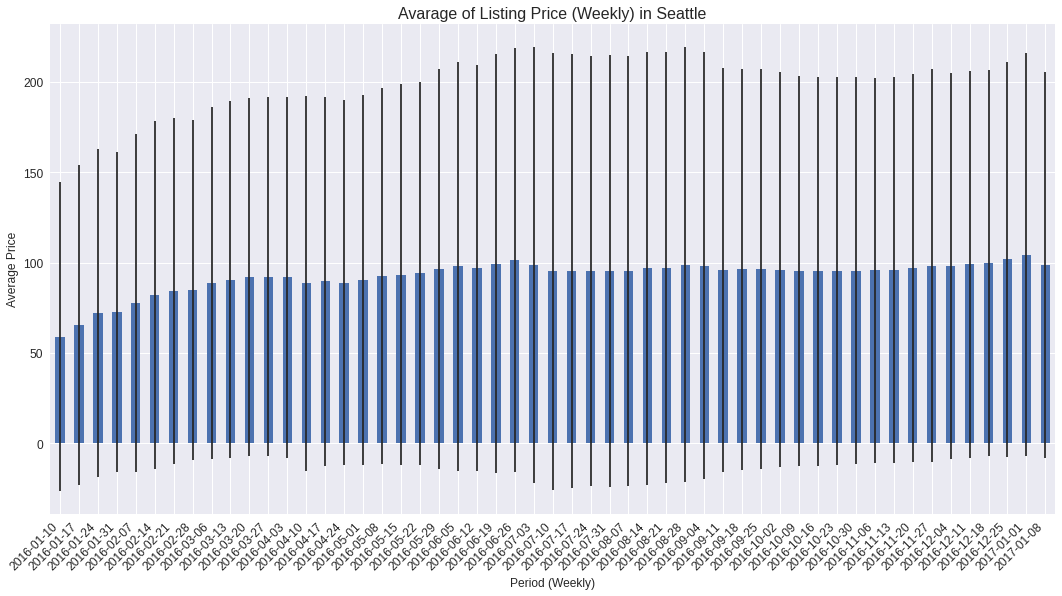

In [ ]:
f.plot_avarage_price(calendar_seattle, 'Seattle', err=True)

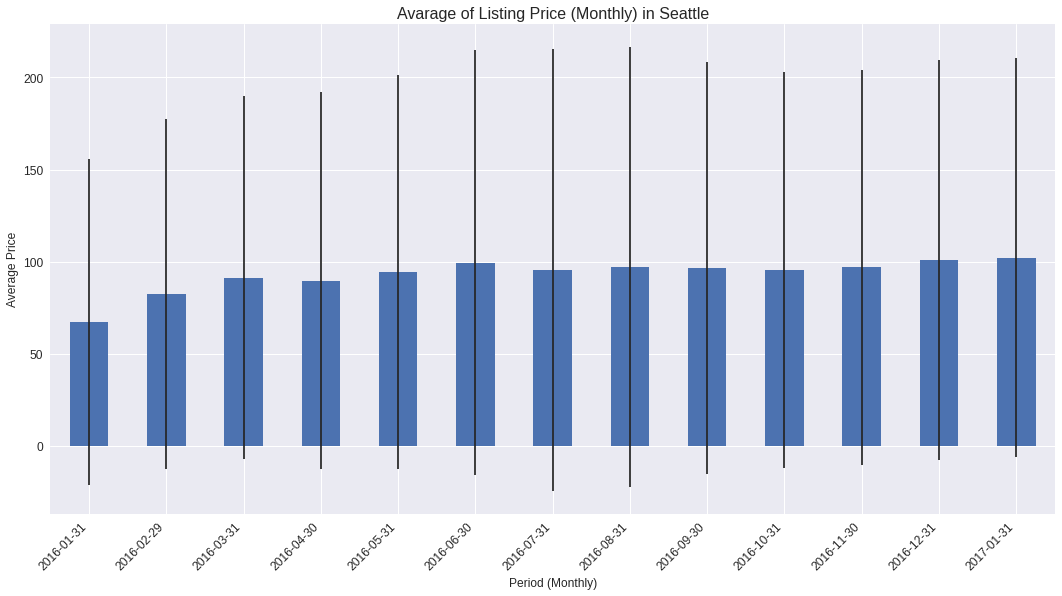

In [ ]:
f.plot_avarage_price(calendar_seattle, 'Seattle', freq='M', err=True)

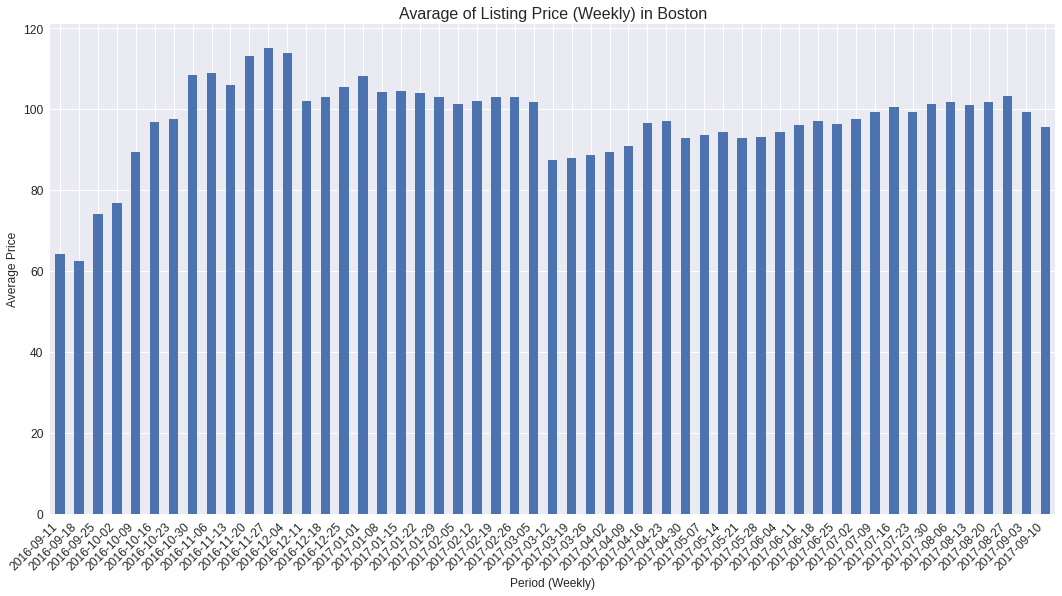

In [ ]:
f.plot_avarage_price(calendar_boston, 'Boston')

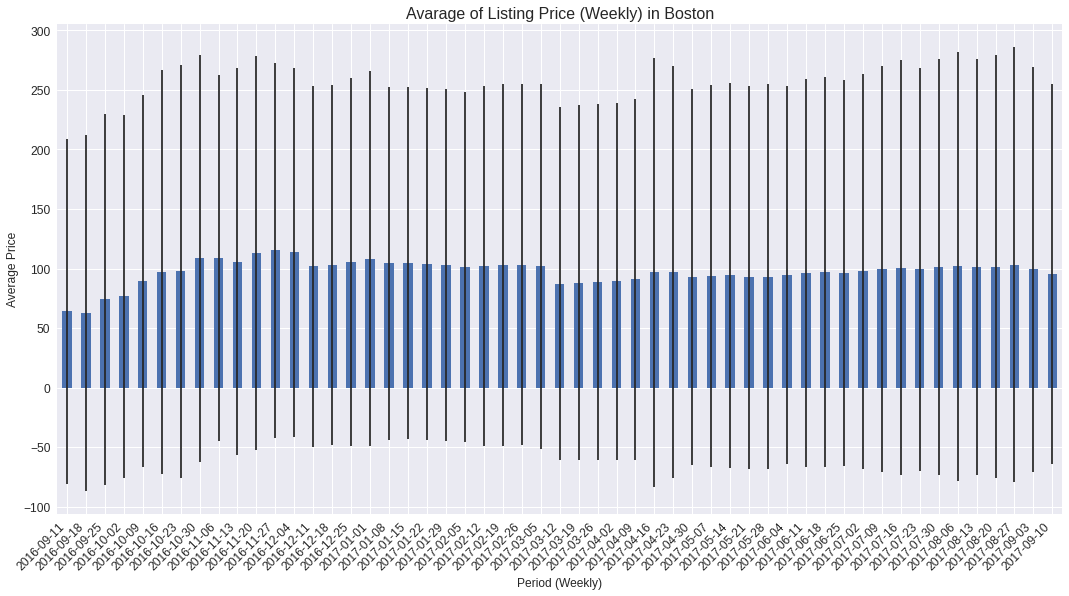

In [ ]:
f.plot_avarage_price(calendar_boston, 'Boston', err=True)

## Reviews x Price

At this point I decided to analyze how the reviews and prices might correlate. I focused on the Seattle dataset.

### Seattle

In order to work with the reviews and prices I will select only the necessary columns at the `listings_seattle.csv` to merge with the calendar data.

In [ ]:
listings_seattle = pd.read_csv('/content/drive/MyDrive/Courses/Udacity/Project_1/data/listings_seattle.csv')

In [ ]:
reviews = listings_seattle[['id', 
                            'number_of_reviews', 
                            'review_scores_rating', 
                            'neighbourhood_group_cleansed']].rename(columns={'id': 'listing_id'}).copy()

In [ ]:
reviews_calendar = calendar_seattle.merge(reviews, on='listing_id', how='inner').copy()

In [ ]:
reviews_calendar.head()

,listing_id,date,available,price,number_of_reviews,review_scores_rating,neighbourhood_group_cleansed
0,241032,2016-01-04,1,8500,207,95.0,Queen Anne
1,241032,2016-01-05,1,8500,207,95.0,Queen Anne
2,241032,2016-01-06,0,0,207,95.0,Queen Anne
3,241032,2016-01-07,0,0,207,95.0,Queen Anne
4,241032,2016-01-08,0,0,207,95.0,Queen Anne


In [ ]:
# Selecting datapoints with more than 10 reviews for a more significant analysis
filtered_df = reviews_calendar[(reviews_calendar.number_of_reviews > 10) &
                               (reviews_calendar.available == 1)].drop_duplicates(subset='listing_id')

In [ ]:
# Selecting X and Y to scatter plot
x = filtered_df['price'].apply(lambda value: value/100)
y = filtered_df['review_scores_rating']

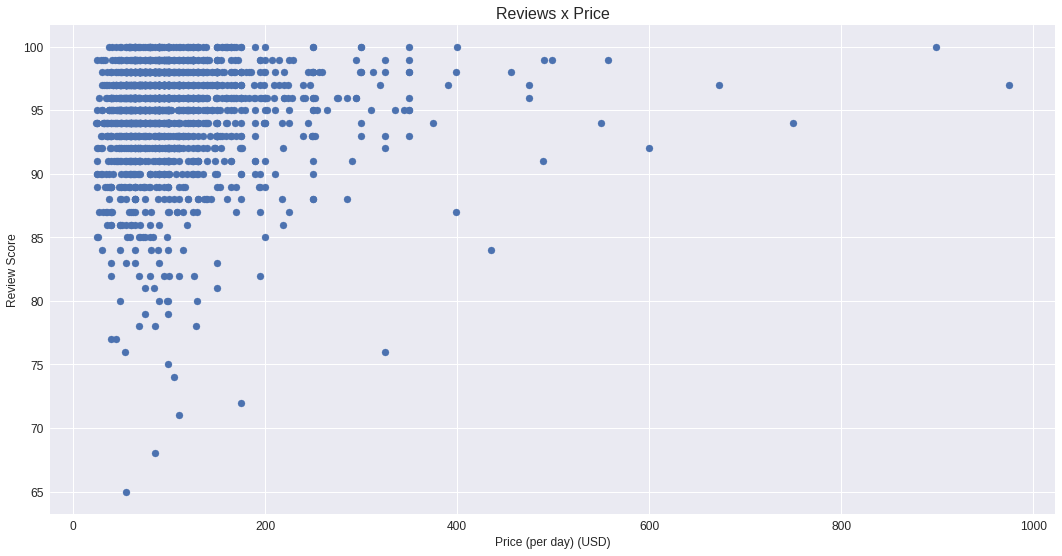

In [ ]:
plt.scatter(x=x ,y=y,)
plt.title(f'Reviews x Price', fontsize=16)
plt.xlabel(f'Price (per day) (USD)', fontsize=12)
plt.ylabel(f'Review Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Seattle: Availability -> 40 dollars and review score of 95

In [ ]:
reviews_calendar.head()

,listing_id,date,available,price,number_of_reviews,review_scores_rating,neighbourhood_group_cleansed
0,241032,2016-01-04,1,8500,207,95.0,Queen Anne
1,241032,2016-01-05,1,8500,207,95.0,Queen Anne
2,241032,2016-01-06,0,0,207,95.0,Queen Anne
3,241032,2016-01-07,0,0,207,95.0,Queen Anne
4,241032,2016-01-08,0,0,207,95.0,Queen Anne


In [ ]:
cheap_good = reviews_calendar[(reviews_calendar.price <= 4000) & 
                              (reviews_calendar.review_scores_rating > 10) &
                              (reviews_calendar.review_scores_rating >= 95)].copy()

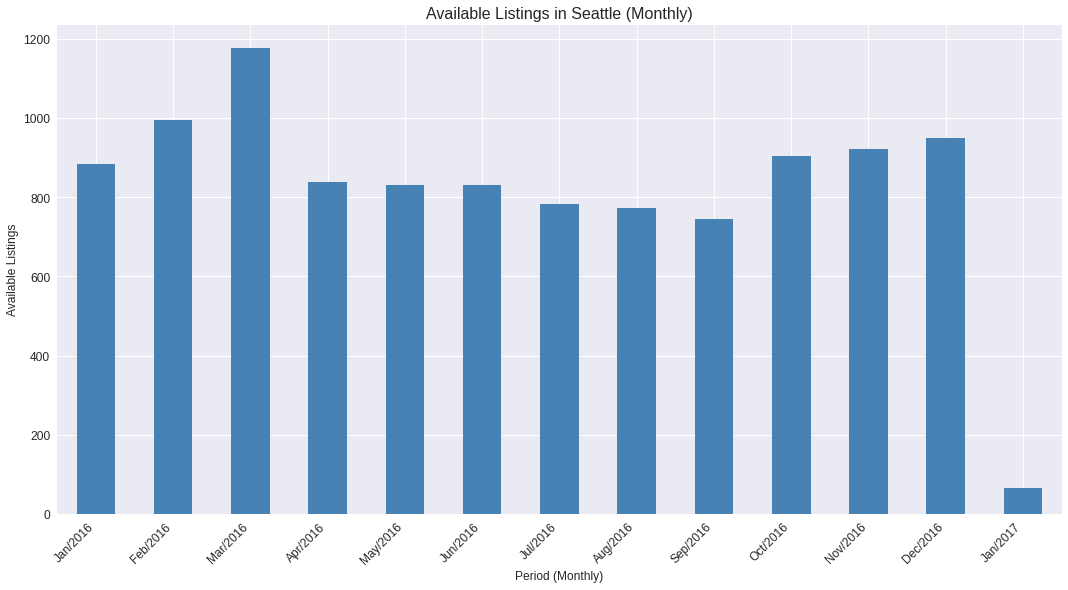

In [ ]:
f.plot_availability(cheap_good, 'Seattle', freq='M')

### Seattle Neighborhoods

In [ ]:
cheap_good.head()

,listing_id,date,available,price,number_of_reviews,review_scores_rating,neighbourhood_group_cleansed
2,241032,2016-01-06,0,0,207,95.0,Queen Anne
3,241032,2016-01-07,0,0,207,95.0,Queen Anne
4,241032,2016-01-08,0,0,207,95.0,Queen Anne
5,241032,2016-01-09,0,0,207,95.0,Queen Anne
6,241032,2016-01-10,0,0,207,95.0,Queen Anne


In [ ]:
facetplot = cheap_good[cheap_good.available == 1].groupby([pd.Grouper(key='date', freq='M'),
                                                           pd.Grouper(key='neighbourhood_group_cleansed')]).count().listing_id

facetplot = facetplot.reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


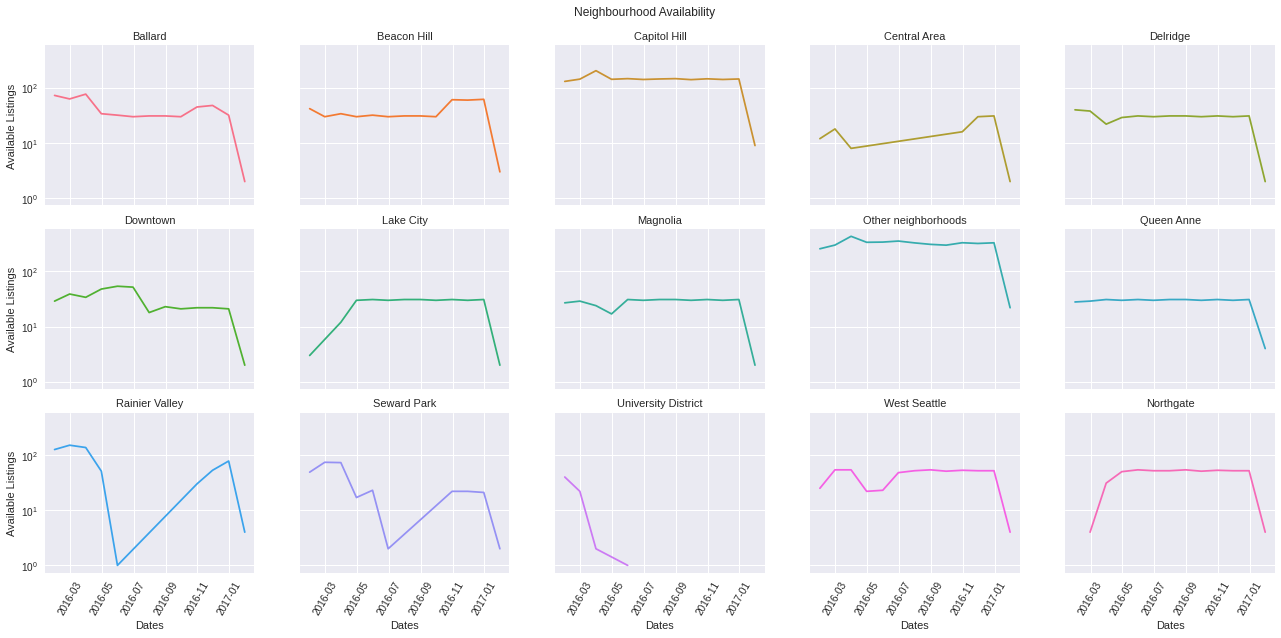

In [ ]:
f.facetplot_neighbourhoods(facetplot)